# Unstructured Data Analytics
## Beer Recommendation System

Created by

| Name   | 
| ------ | 
| Mihir Deshpande |
| Samarth Mishra |
| Muskan Agarwal | 
| Sreekar Lanka | 
| Rishabh Tiwari | 

## DISCLAIMER:
When importing 'car_models_and_brands.csv' to check for Brands and Models, **USE THE FILE PROVIDED IN THE DATA FOLDER AND NOT THE ONE PROVIDED ORIGINALLY**

This is because we have processed the file slightly by doing some data cleaning -

eg. Removed entries where 'car', 'problem', 'seat' was mentioned as a Brand

In order to replicate result, you NEED to use the updated car brands and models files provided in the data folder of zip file.

## Let's import the libraries first

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools as itr


# For NLP -
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

%matplotlib inline


## Let's scrape the Edmunds.com website - 

Link: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans

Note: We have scraped the first 300 pages of the Edmunds forum taking only the __older posts__

In [ ]:
# Let's test Selenium

import time

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = selenium.webdriver.Chrome(ChromeDriverManager().install())

#driver = webdriver.Chrome()  # Optional argument, if not specified will search path.

driver.get('http://www.google.com/');

time.sleep(5) # Let the user actually see something!

search_box = driver.find_element("name",'q')

search_box.send_keys('ChromeDriver')

search_box.submit()

time.sleep(5) # Let the user actually see something!

driver.quit()

In [123]:
import sys
from selenium.webdriver.common.by import By
from IPython.utils import text

import time

import selenium
from webdriver_manager.chrome import ChromeDriverManager

#WebDriver is a browser automation framework that works with open source APIs. 
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
#headless means running chrome with chrome.exe
chrome_options.add_argument('--headless')

chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome(ChromeDriverManager().install(),options=chrome_options)


# Get last page
url = 'https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans'
driver.get(url)
pageelement= driver.find_elements(by=By.XPATH,value='/html/body/div[1]/div[1]/div[2]/div/div/div/div/div[3]/main/div[4]/span/span//a')
lastpage = int(pageelement[len(pageelement)-3].text)
comments = pd.DataFrame(columns = ['Date','user_id','comments']) 

# Iterate through all pages and get comments
for i in range(1,301): # Onlyu look till page 300 to make sure format of comments in HTML stays same
    urlnext = url + '/p'+str(i)
    print(urlnext)
    driver.get(urlnext)
    elements = driver.find_elements(By.CLASS_NAME, "Comment")
    for element in elements:
        author = element.find_element(By.CLASS_NAME, "Author").text
        date = element.find_element(By.TAG_NAME, "time").text
        comment = element.find_element(By.CLASS_NAME, "Item-Body").text
        comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:19: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install(),options=chrome_options)


https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p1


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p2


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p3


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p4


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p5


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p6


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p7


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p8


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p9


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p10


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p11


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p12


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p13


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p14


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p15


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p16


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p17


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p18


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p19


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p20


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p21


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p22


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p23


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p24


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p25


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p26


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p27


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p28


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p29


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p30


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p31


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p32


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p33


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p34


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p35


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p36


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p37


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p38


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p39


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p40


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p41


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p42


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p43


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p44


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p45


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p46


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p47


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p48


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p49


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p50


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p51


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p52


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p53


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p54


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p55


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p56


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p57


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p58


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p59


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p60


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p61


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p62


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p63


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p64


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p65


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p66


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p67


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p68


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p69


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p70


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p71


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p72


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p73


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p74


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p75


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p76


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p77


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p78


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p79


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p80


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p81


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p82


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p83


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p84


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p85


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p86


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p87


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p88


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p89


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p90


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p91


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p92


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p93


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p94


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p95


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p96


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p97


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p98


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p99


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p100


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p101


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p102


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p103


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p104


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p105


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p106


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p107


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p108


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p109


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p110


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p111


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p112


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p113


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p114


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p115


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p116


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p117


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p118


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p119


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p120


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p121


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p122


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p123


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p124


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p125


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p126


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p127


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p128


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p129


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p130


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p131


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p132


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p133


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p134


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p135


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p136


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p137


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p138


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p139


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p140


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p141


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p142


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p143


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p144


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p145


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p146


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p147


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p148


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p149


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p150


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p151


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p152


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p153


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p154


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p155


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p156


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p157


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p158


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p159


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p160


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p161


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p162


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p163


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p164


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p165


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p166


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p167


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p168


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p169


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p170


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p171


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p172


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p173


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p174


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p175


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p176


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p177


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p178


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p179


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p180


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p181


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p182


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p183


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p184


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p185


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p186


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p187


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p188


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p189


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p190


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p191


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p192


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p193


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p194


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p195


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p196


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p197


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p198


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p199


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p200


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p201


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p202


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p203


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p204


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p205


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p206


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p207


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p208


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p209


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p210


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p211


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p212


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p213


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p214


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p215


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p216


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p217


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p218


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p219


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p220


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p221


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p222


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p223


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p224


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p225


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p226


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p227


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p228


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p229


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p230


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p231


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p232


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p233


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p234


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p235


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p236


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p237


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p238


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p239


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p240


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p241


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p242


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p243


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p244


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p245


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p246


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p247


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p248


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p249


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p250


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p251


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p252


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p253


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p254


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p255


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p256


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p257


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p258


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p259


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p260


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p261


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p262


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p263


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p264


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p265


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p266


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p267


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p268


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p269


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p270


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p271


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p272


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p273


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p274


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p275


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p276


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p277


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p278


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p279


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p280


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p281


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p282


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p283


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p284


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p285


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p286


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p287


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p288


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p289


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p290


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p291


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p292


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p293


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p294


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p295


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p296


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p297


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p298


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p299


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p300


C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comments = comments.append(pd.DataFrame([[author, date, comment]],columns = ['Date','user_id','comments']))
C:\Users\Mihir\AppData\Local\Temp\ipykernel_39476\3662011153.py:39:

In [124]:
comments.reset_index(inplace=True,drop=True)
comments

Date       user_id  \
0              merc1    March 2002   
1             fredvh    March 2002   
2      blueguydotcom    March 2002   
3        hungrywhale    March 2002   
4               riez    March 2002   
...              ...           ...   
14995        dino001  January 2013   
14996        dino001  January 2013   
14997        qbrozen  January 2013   
14998     michaellno  January 2013   
14999   billyperksii  January 2013   

                                                comments  
0      I personally think that with a few tweaks the ...  
1      I am debating a new purchase and these two are...  
2      Great handling, RWD, excellent engine and the ...  
3      And no manual tranny. That may not matter to y...  
4      One beauty of BMW 3 Series is that there are s...  
...                                                  ...  
14995  I would believe the website, not the dealer on...  
14996  Wow, the pricing on F30 is simply outrageous.\...  
14997  dammit!\nI really thought you guys were talkin...  
14998  Holy cow! When I did the "build your own" for ...  
14999  Probably Sween, its right in his backyard ( th...  

[15000 rows x 3 columns]

## **Scraper output (csv file)**

In [125]:
comments.to_csv('data/comments_scraped.csv',header=False,index_label=False,index=False)

In [126]:
comments

Date       user_id  \
0              merc1    March 2002   
1             fredvh    March 2002   
2      blueguydotcom    March 2002   
3        hungrywhale    March 2002   
4               riez    March 2002   
...              ...           ...   
14995        dino001  January 2013   
14996        dino001  January 2013   
14997        qbrozen  January 2013   
14998     michaellno  January 2013   
14999   billyperksii  January 2013   

                                                comments  
0      I personally think that with a few tweaks the ...  
1      I am debating a new purchase and these two are...  
2      Great handling, RWD, excellent engine and the ...  
3      And no manual tranny. That may not matter to y...  
4      One beauty of BMW 3 Series is that there are s...  
...                                                  ...  
14995  I would believe the website, not the dealer on...  
14996  Wow, the pricing on F30 is simply outrageous.\...  
14997  dammit!\nI really thought you guys were talkin...  
14998  Holy cow! When I did the "build your own" for ...  
14999  Probably Sween, its right in his backyard ( th...  

[15000 rows x 3 columns]

# Task A)

## Let's look a frequency count of words in our corpus -

In [4]:
car_data = pd.read_csv("data/comments_scraped.csv", header=None)

car_data.head()
car_data[2]

# Let's see if there are any duplicates

car_data.drop_duplicates(subset=2,inplace=True)

car_data.reset_index(inplace=True)


In [6]:
# Let's first get a frequency count of unique words from each blog post -

corpus = []
for i in range(0, len(car_data)):
    #print(car_data[2][i])
    desc = re.sub('[\W]', ' ', str(car_data[2][i]))
    desc = desc.lower()
    desc = desc.split()
    corpus.append(desc)
    

pd.Series(corpus).head()

0    [i, personally, think, that, with, a, few, twe...
1    [i, am, debating, a, new, purchase, and, these...
2    [great, handling, rwd, excellent, engine, and,...
3    [and, no, manual, tranny, that, may, not, matt...
4    [one, beauty, of, bmw, 3, series, is, that, th...
dtype: object

<AxesSubplot:title={'center':'Frequency vs Rank'}, xlabel='Rank', ylabel='Frequency'>

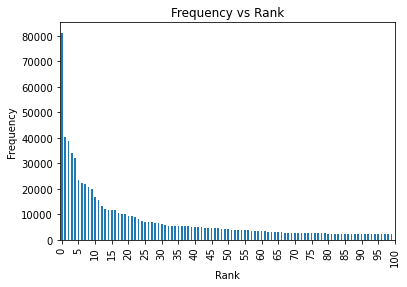

In [216]:
flatcorpus = []
for elem in corpus:
    flatcorpus.extend(elem)

# Export frequency count - 

srs = pd.Series(flatcorpus).value_counts(ascending=False)
srs.to_csv(r'data/my_data_freq.csv')


# Look at frequency plot -
srs[:100].plot(kind='bar',xticks=range(0,101,5),xlabel='Rank',ylabel='Frequency',title='Frequency vs Rank')

In the above graph, we simply plot the frequenices for the top 100 most frequently occuring words. We can already see that there is a sharp drop after the first few hundred words thereby verifying Zipf's law.

## Let's look at the double log plot (Log Rank vs Log Frequency) for the first 100 terms-

In [200]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

Text(3.4, 9, 'Regression Line')

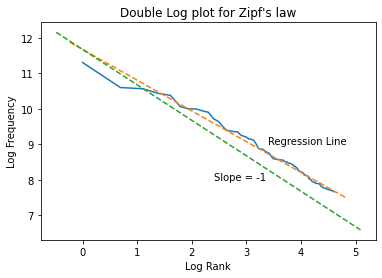

In [201]:
zipf = pd.DataFrame(srs[:100],columns=['Freq'])
zipf['Rank'] = range(1,(len(zipf)+1))

plt.plot(np.log(zipf['Rank']),np.log(zipf['Freq']))
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.title("Double Log plot for Zipf's law")


from sklearn.linear_model import LinearRegression
X_train = pd.DataFrame(np.log(zipf['Rank']))
Y_train = np.log(zipf['Freq'])
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

abline(linreg.coef_, linreg.intercept_)
abline(-1, linreg.intercept_)

plt.annotate('Slope = -1',(2.4,8))
plt.annotate('Regression Line',(3.4,9))

Plotting the regression line (log frequency regressed on log rank) alongwith a line of Slope = -1 (theoretically predicted by zipf's law), we can see Zipf's law is almost satisfied econometrically.

## Now, let's take the first 1000 terms and check if Zipf's law is satisfied -

Text(3.5, 9, 'Regression Line')

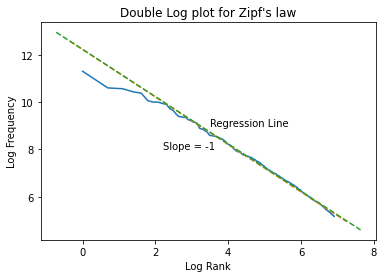

In [205]:
zipf = pd.DataFrame(srs[:1000],columns=['Freq'])
zipf['Rank'] = range(1,(len(zipf)+1))

plt.plot(np.log(zipf['Rank']),np.log(zipf['Freq']))
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.title("Double Log plot for Zipf's law")


from sklearn.linear_model import LinearRegression
X_train = pd.DataFrame(np.log(zipf['Rank']))
Y_train = np.log(zipf['Freq'])
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

abline(linreg.coef_, linreg.intercept_)
abline(-1, linreg.intercept_)

plt.annotate('Slope = -1',(2.2,8))
plt.annotate('Regression Line',(3.5,9))

We can see when we take a larger no. of terms, the data follows Zipf's law almost perfectly.

# Task B)

Let's replace the car models with their corresponding brands and find the top 10 most mentioned brands -

In [11]:
# Let's replace particular car models by brand names -

# import model to brand map -
mod_brand = pd.read_csv("data/car_models_and_brands.csv")

print(len(mod_brand))

# Let's remove any duplicate entries
mod_brand.drop_duplicates(inplace=True)

print(len(mod_brand))

In [17]:
# Let's create a function to replace model with brand  -

def replace_model_brand (comment):
    for model in list(mod_brand['Model']):
        if model in comment:
            #sub = mod_brand[mod_brand['Model']==word]
            comment = re.sub(model,mod_brand[mod_brand['Model']==model]['Brand'].iloc[0],comment)
            #print(comment)
    return comment


In [207]:
# Let's look at frequency plot after substituting the models for brand names -


# Create new corpus with updated brand-model names -

corpus_upd = []
for i in range(0, len(car_data)):
    desc = re.sub('[\W]', ' ', str(car_data[2][i]))
    desc = desc.lower()
    desc = replace_model_brand(desc)
    desc = desc.split()
    all_stopwords = stopwords.words('english')
    desc = [word for word in desc if not word in set(all_stopwords)]
    # Remove duplicates from each post
    desc = list(set(desc))
    corpus_upd.append(desc)
    

flatcorpus_upd = []
for elem in corpus_upd:
    flatcorpus_upd.extend(elem)


# Look at frequency plot -
srs_1 = pd.Series(flatcorpus_upd).value_counts(ascending=False)
srs_1.to_csv(r'data/my_data_freq_updated.csv')

# Look at frequency plot -
#srs_1[:100].plot(kind='bar')

The above frequency plot correponds to our data asfter we removed stopwords, replaced models with brands and removed duplicate entries (if one comment mentions 'mercedes' two or more times, the total count for 'mercedes' only increases by 1 since it's the same post that mentions 'mercedes' multiple times.

## Let's see what the top 10 most mentioned brands are -

In [24]:
# Let's look at the top 10 brands -

top = []
top_val = []

for ind, row in srs_1.iteritems():
    if ind in list(mod_brand['Brand']):
        top.append(ind)
        top_val.append(row)

top10 = top[0:10]   # Ignore 'cars' which is the first entry # Update - I just removed the entry from car models and brands excel sheet
top10_val = top_val[0:10]


In [25]:
# Get frequencies of individual brand
top10_freq ={}
for i in range(0,len(top10)):
    top10_freq[top10[i]] = top10_val[i]

top10_freq

{'bmw': 4802,
 'acura': 2227,
 'honda': 1944,
 'audi': 1802,
 'toyota': 1423,
 'infiniti': 1373,
 'nissan': 1151,
 'subaru': 843,
 'mercedes': 815,
 'volkswagen': 747}

**The brands above are the top 10 most frequently mentioned (per post/comment) brands in the thread alongwith their counts.**

# Task C)

## Let's calculate Lift values for these top 10 most frequently occurring brands

In [77]:
# Populating the matrix with cross tabulation values (# of times when row i and column j were both mentioned in one comment)
# This is the first step in calculating the lift values
# Then we calculate lift values

def calc_lift_dissimilarity(corpus,df,mat_a,mat_b,mat_a_freq,mat_b_freq,diss=False):

    for sent in range(0,len(corpus)):
        for i in range(0,len(df)):
            if mat_a[i] in corpus[sent]:
                #print(i)
                for j in range(0,len(df.columns)):
                    if mat_b[j] in corpus[sent]:
                        #print(top10[j])
                        df.iloc[i][j]+=1
    # We calculate Lift by the following formula - 
    # Lift (A,B) = [N*#(A,B)] / [#(A)*#(B)]
    
    N = len(corpus)
    for i in range(0,len(mat_a)):
        for j in range(0,len(mat_b)):
            #df.iloc[i,j] = (N*df.iloc[i,j])/(top10_freq[top10[i]]*top10_freq[top10[j]])
            num = N*df.iloc[i,j]
            #print(mat_a[i])
            #print(type(mat_a[i]))
            denom = mat_a_freq[mat_a[i]]*mat_b_freq[mat_b[j]]
            if num==0:
                df.iloc[i,j] = 0
            elif diss:
                df.iloc[i,j] = denom/num
            else:
                df.iloc[i,j] = num/denom
    return df

## Let's look at the Lift value table between top 10 brands -

In [58]:
# Let's calculate lift using above function -
# Create required zero matrix initially
zero_data = np.zeros(shape=(len(top10),len(top10)))
lift_df = pd.DataFrame(zero_data)
lift_df.columns = top10
lift_df.index = top10


lift_df = calc_lift_dissimilarity(corpus_upd,lift_df,top10,top10,top10_freq,top10_freq)

# Creating upper triangular matrix with diagonals = 0
lift_df = pd.DataFrame(np.triu(lift_df),columns=top10,index=top10)
for i in range(0,len(lift_df)):
    for j in range(0,len(lift_df)):
        if i==j:
            lift_df.iloc[i][j]=0
lift_df

bmw     acura     honda      audi    toyota  infiniti    nissan  \
bmw         0.0  1.215245  1.239964  1.543338  1.367853  1.673979  0.890194   
acura       0.0  0.000000  2.124443  2.336571  1.453490  2.582436  1.936997   
honda       0.0  0.000000  0.000000  1.302073  4.254612  1.249466  1.597397   
audi        0.0  0.000000  0.000000  0.000000  1.131432  2.242513  1.759325   
toyota      0.0  0.000000  0.000000  0.000000  0.000000  1.393100  1.680057   
infiniti    0.0  0.000000  0.000000  0.000000  0.000000  0.000000  2.167085   
nissan      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
subaru      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
mercedes    0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
volkswagen  0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

              subaru  mercedes  volkswagen  
bmw         0.842309  1.857133    1.159013  
acura       2.174710  1.903358    2.427221  
honda       0.894311  1.623533    1.513864  
audi        1.043542  3.258547    4.932806  
toyota      0.710606  1.831101    1.308410  
infiniti    0.969058  2.672934    1.662264  
nissan      5.594872  1.259449    3.530909  
subaru      0.000000  1.110124    1.306174  
mercedes    0.000000  0.000000    2.137113  
volkswagen  0.000000  0.000000    0.000000

## We know dissimilarity = 1/Lift
## Let's look at the corresponding dissimilarity table -

In [59]:
# Let's calculate the dissimilarity matrix -
diss_df = pd.DataFrame(zero_data, columns=top10, index=top10)
diss_df = calc_lift_dissimilarity(corpus_upd,lift_df,top10,top10,top10_freq,top10_freq,diss=True)

# Creating upper triangular matrix with diagonals = 0
diss_df = pd.DataFrame(np.triu(diss_df),columns=top10,index=top10)
for i in range(0,len(diss_df)):
    for j in range(0,len(diss_df)):
        if i==j:
            diss_df.iloc[i][j]=0
diss_df

bmw    acura     honda      audi    toyota  infiniti    nissan  \
bmw         0.0  0.82173  0.805185  0.646828  0.729476  0.596027  1.120319   
acura       0.0  0.00000  0.469091  0.426389  0.684768  0.385347  0.513268   
honda       0.0  0.00000  0.000000  0.764742  0.233775  0.795883  0.621862   
audi        0.0  0.00000  0.000000  0.000000  0.878711  0.443249  0.564331   
toyota      0.0  0.00000  0.000000  0.000000  0.000000  0.712371  0.589832   
infiniti    0.0  0.00000  0.000000  0.000000  0.000000  0.000000  0.457123   
nissan      0.0  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
subaru      0.0  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
mercedes    0.0  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
volkswagen  0.0  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   

              subaru  mercedes  volkswagen  
bmw         1.182843  0.536415    0.859221  
acura       0.456197  0.521094    0.408323  
honda       1.108067  0.610181    0.653828  
audi        0.948933  0.303792    0.200497  
toyota      1.389922  0.539167    0.753683  
infiniti    1.018767  0.369187    0.592943  
nissan      0.176022  0.781538    0.278371  
subaru      0.000000  0.881610    0.747835  
mercedes    0.000000  0.000000    0.456702  
volkswagen  0.000000  0.000000    0.000000

In [60]:
# Computing Multi-Dimensional Scaling -

from sklearn.manifold import MDS


# We need to transform our upper triangular dissimilarity matrix into a symmetric matrix in order to plot MDS -
diss_mat = diss_df+diss_df.T
diss_mat

mds = MDS(dissimilarity='precomputed', random_state=0)
# Get the embeddings
diss_trans = mds.fit_transform(diss_mat)

diss_trans

array([[-0.6367883 ,  0.22557106],
       [ 0.17942509, -0.01565722],
       [ 0.21329314,  0.44242112],
       [-0.22608884, -0.26020115],
       [ 0.0445466 ,  0.56634618],
       [-0.16820412,  0.0750519 ],
       [ 0.36252856, -0.22304464],
       [ 0.52077772, -0.54042208],
       [-0.30452394,  0.00848873],
       [ 0.01503409, -0.2785539 ]])

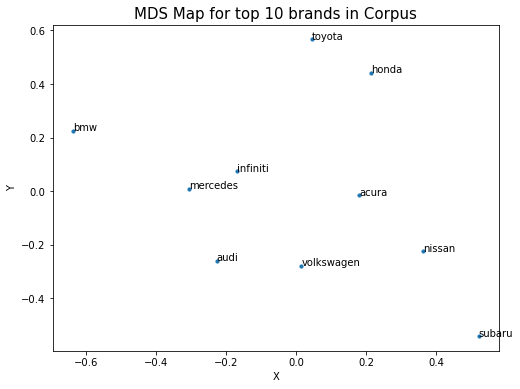

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(diss_trans[:,0], diss_trans[:,1], s=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("MDS Map for top 10 brands in Corpus",fontsize=15)
for i, label in enumerate(top10):
    plt.annotate(label, (diss_trans[i,0], diss_trans[i,1]))

plt.show()

## Task E: What insights can you offer to your client from your analyses in Tasks C and D 

### Let's try to cluster the brands using K-means and see what we get (3 clusters) -

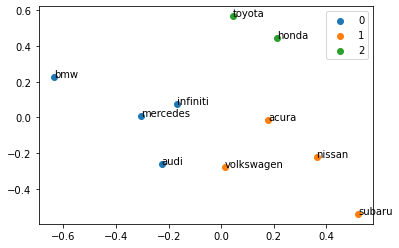

In [62]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(diss_trans)

diss_df_lab = pd.DataFrame(diss_trans)
diss_df_lab['label'] = label

#Getting unique labels
 
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(diss_df_lab[label==i][0] , diss_df_lab[label==i][1] , label = i)
for i, label in enumerate(top10):
    plt.annotate(label, (diss_trans[i,0], diss_trans[i,1]))
plt.legend()
plt.show()


#### What insights can you offer to your client from your analyses in Tasks C and D 

Based on the analysis in Tasks C and D, we can offer some useful insights to our client into the market dynamics of the luxury car market in the US. 

Toyota and Honda are in close proximity in the MDS plot which indicates that these brands are compared the most to each other and are kind of similar. They may pose as the biggest competitors to each other. Similarly, Mercedes and Infiniti are also very close to each other in the MDS plot with people talking about the two brands together in their comments. This indicates people might be comparing the two brands closely in terms of their performance and features (also indicated in Task F) and hence there might be high switching between these two brands.

BMW and Subaru have created their own separate niches in the market occupying two different corners in the MDS plot. They appear to be least related to the other luxury brands present in the market.

## Task F: What are 5 most frequently mentioned attributes or features of cars in the discussions? Which attributes are most strongly associated with which of these 5 brands? You DON’T have to do a sentiment analysis for this assignment.

In [63]:
# Let's take a look at the word frequency list again -

srs_1[0:50]

# Looking at the excel file, we get the following top features or attributes -
# attributes = ['performance', 'luxury', 'make', 'interior', 'sport', 'engine', 'manual', 'speed']

attributes = ['price','performance','driving','make','awd','luxury','manual','engine','sport','interior', 'speed', 'power',
             'rwd', 'fwd', 'handling', 'value', 'auto', 'fun', 'looks', 'transmission']

In [76]:
# Let's calculate attribute frequencies -


attr_freq = {}

for ind, row in srs_1.iteritems():
    if ind in attributes:
        
        attr_freq[ind] = row

attr_freq

{'price': 1754,
 'performance': 1749,
 'driving': 1570,
 'make': 1489,
 'awd': 1442,
 'luxury': 1392,
 'engine': 1212,
 'manual': 1101,
 'sport': 1066,
 'interior': 998,
 'power': 955,
 'speed': 954,
 'handling': 937,
 'rwd': 866,
 'fwd': 800,
 'value': 705,
 'auto': 691,
 'fun': 668,
 'looks': 667,
 'transmission': 613}

In [102]:
# Let's calculate lift between the top 10 car brands and these features to see 
# which features are strongly related to which brands 
zero_data = np.zeros(shape=(len(attributes),len(top10)))
lift_attr_df = pd.DataFrame(zero_data)
lift_attr_df.columns = top10
lift_attr_df.index = attributes

In [221]:
lift_attr_df = calc_lift_dissimilarity(corpus_upd,lift_attr_df,attributes,top10,attr_freq,top10_freq)

threshold = 1.6

for i in range(0,len(lift_attr_df)):
    for j in range (0,len(lift_attr_df.columns)):
        if lift_attr_df.iloc[i][j]<=threshold:
            lift_attr_df.iloc[i][j] = 0

lift_attr_df

bmw     acura     honda      audi    toyota  infiniti  \
price         0.000000  0.000000  0.000000  0.000000  0.000000  1.837055   
performance   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
driving       0.000000  0.000000  1.669218  1.668596  1.617300  0.000000   
make          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
awd           0.000000  2.184920  3.330637  1.707579  3.934910  1.643889   
luxury        0.000000  1.735402  0.000000  1.787270  1.932158  2.050383   
manual        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
engine        0.000000  0.000000  0.000000  0.000000  0.000000  1.704734   
sport         1.667194  0.000000  0.000000  1.851631  1.712432  1.992191   
interior      0.000000  0.000000  0.000000  2.398080  0.000000  2.008033   
speed         0.000000  1.630392  1.739577  0.000000  0.000000  0.000000   
power         0.000000  0.000000  1.624057  1.761903  0.000000  1.811079   
rwd           0.000000  1.703568  0.000000  0.000000  0.000000  0.000000   
fwd           0.000000  2.725602  1.640753  1.708486  0.000000  0.000000   
handling      0.000000  0.000000  0.000000  1.715627  1.826046  0.000000   
value         1.686060  1.653951  0.000000  1.631720  0.000000  2.196410   
auto          0.000000  0.000000  0.000000  0.000000  0.000000  1.665189   
fun           0.000000  0.000000  0.000000  1.911882  0.000000  0.000000   
looks         0.000000  0.000000  0.000000  1.801408  0.000000  1.825650   
transmission  0.000000  1.938097  0.000000  0.000000  1.796143  1.754188   

                nissan   subaru  mercedes  volkswagen  
price         0.000000  0.00000  1.828796    0.000000  
performance   0.000000  0.00000  1.653851    0.000000  
driving       0.000000  0.00000  0.000000    0.000000  
make          0.000000  0.00000  0.000000    0.000000  
awd           0.000000  0.00000  0.000000    0.000000  
luxury        0.000000  1.62626  2.844833    1.648567  
manual        0.000000  0.00000  1.643583    0.000000  
engine        0.000000  0.00000  1.659877    1.779853  
sport         0.000000  0.00000  1.856050    0.000000  
interior      0.000000  0.00000  1.816279    1.780247  
speed         0.000000  0.00000  0.000000    0.000000  
power         0.000000  0.00000  0.000000    1.883455  
rwd           0.000000  0.00000  1.644488    0.000000  
fwd           1.865075  0.00000  0.000000    0.000000  
handling      0.000000  0.00000  1.896861    0.000000  
value         0.000000  0.00000  2.083020    0.000000  
auto          0.000000  0.00000  0.000000    0.000000  
fun           0.000000  0.00000  1.778123    2.839892  
looks         0.000000  0.00000  2.091804    0.000000  
transmission  0.000000  0.00000  2.343103    0.000000

(4.75, 10.25, 10.1, 51.9)

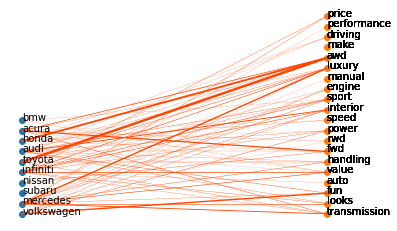

In [222]:
x_model = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
y_model = [30,28,26,24,22,20,18,16,14,12]

x_attr = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
y_attr = [50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12]


model_dict ={}
attr_dict={}

for i in range(0,len(top10)):
    model_dict[(x_model[i],y_model[i])] = top10[i]
    
for i in range(0,len(attributes)):
    attr_dict[(x_attr[i],y_attr[i])] = attributes[i]

#print(model_dict)
#print(attr_dict)

for i in list(model_dict.keys()):
    #print(i)
    plt.annotate(model_dict[i],i)
    for j in list(attr_dict.keys()):
        #print("/////")
        x_values = [i[0], j[0]]
        y_values = [i[1], j[1]]
        width = lift_attr_df.loc[attr_dict[j],model_dict[i]]-threshold
        if width<0:
            width=-0.1
        #print(type(lift_attr_df.loc[attr_dict[j],model_dict[i]]))
        plt.plot(x_values, y_values, 'orangered', linestyle="-",linewidth=width+0.1)
        j_temp = pd.Series(j)-pd.Series([10,0])
        #print(pd.Series(j))
        #print("//////")
        #print(j_temp)
        plt.annotate(attr_dict[j],j)

plt.scatter(x=x_model, y=y_model)
plt.scatter(x=x_attr, y=y_attr)
plt.axis('off')


In the above plot we are showing the association between the brands and most popular attributes and the thickness of the line represents how strongly it is associated between the brand and the attribute. 
**Top 5 Attributes: Price: 1754, Performance: 1749, Driving: 1570, Awd: 1442, Luxury: 1392**

Brands associated with each attribute:

Price - Strongly associated with Infiniti and Mercedes

Performance - Strongly associated with Mercedes

Driving - Strongly associated with Audi, Honda and Toyota

Awd - Strongly associated with Acura, Honda and Toyota

Luxury - Strongly associated with Infiniti, Mercedes and Toyota

# Task G)

We can provide the attribute analysis to our client giving them a broad level idea about which car attributes are most important for the customers (Price, Performance, Driving, All Wheel Drive (AWD) and Luxury). 

Also, below are the most talked about attribute for each of the brands which can be mentioned to our client for their competitive analysis:

BMW - Value and Sport

Acura - FWD and AWD

Honda - AWD

Audi - Interior

Toyota - AWD

Infiniti - Luxury and Value

Nissan - FWD

Subaru - Luxury

Mercedes - Luxury, Transmission, Looks and Value

Volkswagen - Fun, Power, Interior and Engine


Some brands flagging out for attributes (Lift>2.5):

1. When it comes to 'AWD (All wheel drive)', Honda (3.31) and Toyota (3.91) are most talked about. We also observed their high similarity in the MDS plot. The two brands should be aware of this heavy competiton in the market and strategize their marketing tactics accordingly
2. When it comes to 'luxury', Mercedez (2.81) stands out compared to other brands - The marketing team should align their marketing strategies and tagline in line with 'luxury'
3. Acura (2.70) outperforms its competitors on 'FWD (Front wheel drive)'
4. People associate Volkswagen (2.76) with 'fun' significantly more compared to its competitors creating an opportunity for its differentiation in the market

## Task H: Which is the most aspirational brand in your data in terms of people actually wanting to buy or own? Describe your analysis. What are the business implications for this brand?

Approach: We defined "aspirational" as the people's willingness and desire to buy and own a particular car brand. So to calculate the "aspirational scores" of a brand, we calculated the lift scores of that brand by 'aspirational-like words (list given below)

Going through the unfiltered word frequency list, let's set a threshold of frequency at ~500
(Any words that occur less than 500 times are probably not worth considering).

Now let's pick out any words within this threshold that might indicate that the user aspires to own or buy a car -

In [139]:
aspirations = ['want','buy','need','pay','choice','worth', 'wish', 'hope','own']

Eg. "I want a BMW right now!"

"I need a bugatti like I need a hole in the head - Abraham Lincoln"

"A nissan is definnitely my choice"

and so on...

In [141]:
def replace_word (replace_list, replace_word, word):
    if word in list(replace_list):
        return replace_word
    else:
        return word

## Method used to calculate 'aspiration' for Brands -

We are **replacing** all words from the aspirations word list with the word **'aspiration'**

Then we caclulate the lift between the top 10 brands with the word 'aspiration' to find out how 'aspirational' the brands are.


In [153]:
# Create new corpus with updated brand-model names and updated aspirational words -


repl_word = 'aspiration'  ## Set the word you want to replace all aspirational words with
corpus_upd_asp = []
for i in range(0, len(car_data)):
    desc = re.sub('[\W]', ' ', str(car_data[2][i]))
    desc = desc.lower()
    desc = replace_model_brand(desc)
    desc = desc.split()
    all_stopwords = stopwords.words('english')
    desc = [replace_word(aspirations, repl_word, word) for word in desc if not word in set(all_stopwords)]
    # Remove duplicates from each post
    desc = list(set(desc))
    corpus_upd_asp.append(desc)
    

flatcorpus_upd_asp = []
for elem in corpus_upd_asp:
    flatcorpus_upd_asp.extend(elem)


# Look at frequency plot -
srs_2 = pd.Series(flatcorpus_upd_asp).value_counts(ascending=False)

In [154]:
# Let's calculate lift between the top 10 car brands and aspirational keywords to see 
# which brands are most aspired -
zero_data = np.zeros(shape=(1,len(top10)))
lift_asp_df = pd.DataFrame(zero_data)
lift_asp_df.columns = top10
lift_asp_df.index = ['aspiration']

In [155]:
# Let's calculate aspiration frequencies -


asp_freq = {}

for ind, row in srs_2.iteritems():
    if ind == repl_word:
        
        asp_freq[ind] = row

asp_freq

{'aspiration': 4411}

In [156]:
lift_asp_df = calc_lift_dissimilarity(corpus_upd_asp,lift_asp_df,[repl_word],top10,asp_freq,top10_freq)

threshold = 0

for i in range(0,len(lift_asp_df)):
    for j in range (0,len(lift_asp_df.columns)):
        if lift_asp_df.iloc[i][j]<=threshold:
            lift_asp_df.iloc[i][j] = 0

lift_asp_df

bmw     acura     honda      audi   toyota  infiniti  \
aspiration  1.349236  1.345803  1.241747  1.525863  1.30088  1.442088   

              nissan    subaru  mercedes  volkswagen  
aspiration  1.469855  1.166326  1.431035    1.788237

## Insights -

1) The most 'aspirational' brand is Volkswagen meaning most of the users in this forum want to own a Volkswagen. 
Looking at the lift matrix between brands, Volkswagen is mostly compared with brands like Audi, Nissan, Acura and Subaru. However, except Nissan and Audi, the other brands aren't too aspirational. Maybe Volkswagen need to primarily focus on Audi and Nissan as their competitors since customers are very aspirational to own these brands.

2) The Top 3 most aspirational brands are Volkswagen, Nissan and Audi. The attributes associated with them are as follows -

[luxury, interior, fun factor, handling, looks and forward wheel drive].

From this, customers mostly aspire to own cars with good interiors and looks, which are associated with a fun factor but also ones which are forward wheel drive.

Interestingly enough technical attributes such as the cars engine, performance, transmission, etc aren't associated too much with highly aspirational brands. Even the price doesn't seem to play a factor. Maybe the manufacturers can focus on more on the feel and perception of the brand such as how sporty or 'fun' the cars are rather than extremely technical aspects if they want customers to buy their cars.

